# LSTM Crude Oil Price Prediction

Prediction of future crude oil price is considered a significant challenge due to the extremely complex, chaotic, and dynamic nature of the market and stakeholder's perception. The crude oil price changes every minute, and millions of shares ownerships are traded everyday. The market price for commodity such as crude oil is influenced by many factors including news, supply-and-demand gap, labour costs, amount of remaining resources, as well as stakeholders' perception. Therefore, various indicators for technical analysis have been utilized for the purpose of predicting the future crude oil price. Recently, many researchers have turned to machine learning approached to cater to this problem. This study demonstrated the use of RNN-LSTM networks for predicting the crude oil price based on historical data alongside other technical analysis indicators. This study aims to certify the capability of a prediction model built based on the RNN-LSTM network to predict the future price of crude oil. The developed model is trained and evaluated against accuracy matrices to assess the capability of the network to provide an improvement of the accuracy of crude oil price prediction as compared to other strategies. The result obtained from the model shows a promising prediction capability of the RNN-LSTM algorithm for predicting crude oil price movement.

## Data Source
U.S. Energy Information Administration, Crude Oil Prices: Brent - Europe [DCOILBRENTEU], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/DCOILBRENTEU, March 18, 2022.

In [2]:
from io import StringIO
import requests
import json
import pandas as pd

# @hidden_cell
# This function accesses a file in your Object Storage. The definition contains your credentials.
# You might want to remove those credentials before you share your notebook.
def get_object_storage_file_with_credentials_d3bd5b94a9334de59a55a7fed2bedeaa(container, filename):
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage."""

    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': 'member_adcb54bd899a7e39e31582bccad1577f68f1992f','domain': {'id': '4619da2fa8524beda11c89d2d1969c5b'},
            'password': 'P*/m8,!#7s6H9poz'}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', container, '/', filename])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO(resp2.text)

In [3]:
df_data = pd.read_csv('DCOILBRENTEU.csv')
df_data.head()

,DATE,DCOILBRENTEU
0,1987-09-01,18.43
1,1987-09-02,18.40
2,1987-09-03,18.18
3,1987-09-04,18.13
4,1987-09-07,17.60


In [4]:
df_data.tail()

,DATE,DCOILBRENTEU
9005,2022-03-08,133.18
9006,2022-03-09,116.58
9007,2022-03-10,114.54
9008,2022-03-11,118.11
9009,2022-03-14,110.39


In [5]:
df_data = df_data[df_data.DCOILBRENTEU != "."]
print(df_data.shape)

(8767, 2)


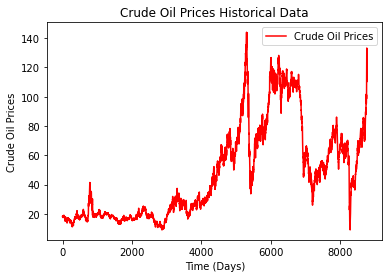

In [6]:
import matplotlib.pyplot as plt
df_data_plot = df_data.iloc[:,1:2].values.astype(float)
# Visualising the Data
plt.plot(df_data_plot, color = 'red', label = 'Crude Oil Prices')
plt.title('Crude Oil Prices Historical Data')
plt.xlabel('Time (Days)')
plt.ylabel('Crude Oil Prices')
plt.legend()
plt.show()

In [7]:
#import packages
import numpy as np
import pandas as pd
from keras.preprocessing import sequence
from keras.models import load_model

In [8]:
# defining the batch size and number of epochs
batch_size = 64
epochs = 120
timesteps = 30

In [9]:
length = len(df_data)
print(length)
length *= 1 - 0.1
print(length)

8767
7890.3


In [10]:
7894.8%64.0

22.800000000000182

In [11]:
8772%64.0

4.0

In [12]:
def get_train_length(dataset, batch_size, test_percent):
    # substract test_percent to be excluded from training, reserved for testset
    length = len(dataset)
    length *= 1 - test_percent
    train_length_values = []
    for x in range(int(length) - 100,int(length)): 
        modulo=x%batch_size
        if (modulo == 0):
            train_length_values.append(x)
            print(x)
    return (max(train_length_values))

In [13]:
length = get_train_length(df_data, batch_size, 0.1)
print(length)

7808
7872
7872


In [14]:
#Adding timesteps * 2
upper_train = length + timesteps*2
df_data_train = df_data[0:upper_train]
training_set = df_data_train.iloc[:,1:2].values
training_set.shape

(7932, 1)

In [15]:
# Feature Scaling
#scale between 0 and 1. the weights are esier to find.
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(np.float64(training_set))
training_set_scaled.shape

(7932, 1)

In [16]:
X_train = []
y_train = []

# Creating a data structure with n timesteps

print(length + timesteps)
for i in range(timesteps, length + timesteps): 
    X_train.append(training_set_scaled[i-timesteps:i,0])
    y_train.append(training_set_scaled[i:i+timesteps,0])

print(len(X_train))
print(len(y_train))
#create X_train matrix
#30 items per array (timestep) 
print(X_train[0:2])
print(np.array(X_train).shape)
#create Y_train matrix
#30 items per array (timestep) 
print(y_train[0:2])
print(np.array(y_train).shape)

7902
7872
7872
[array([0.06918799, 0.06896552, 0.06733407, 0.06696329, 0.063033  ,
       0.06362625, 0.06525769, 0.06822395, 0.06733407, 0.06711161,
       0.06992955, 0.06992955, 0.06918799, 0.06822395, 0.06807564,
       0.06955877, 0.06955877, 0.0710419 , 0.07044865, 0.07081943,
       0.06970708, 0.06955877, 0.06970708, 0.07081943, 0.07178346,
       0.07044865, 0.07030033, 0.07067112, 0.07044865, 0.07007786]), array([0.06896552, 0.06733407, 0.06696329, 0.063033  , 0.06362625,
       0.06525769, 0.06822395, 0.06733407, 0.06711161, 0.06992955,
       0.06992955, 0.06918799, 0.06822395, 0.06807564, 0.06955877,
       0.06955877, 0.0710419 , 0.07044865, 0.07081943, 0.06970708,
       0.06955877, 0.06970708, 0.07081943, 0.07178346, 0.07044865,
       0.07030033, 0.07067112, 0.07044865, 0.07007786, 0.07007786])]
(7872, 30)
[array([0.07007786, 0.0710419 , 0.0710419 , 0.07341491, 0.07415647,
       0.07178346, 0.07289581, 0.07437894, 0.07326659, 0.07156099,
       0.07193178, 0.07230256,

In [17]:
# Reshaping
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1], 1))
print(X_train.shape)
print(y_train.shape)

(7872, 30, 1)
(7872, 30, 1)


In [18]:
# Building the LSTM
# Importing the Keras libraries and packages

from keras.layers import Dense
from keras.layers import Input, LSTM
from keras.models import Model
import h5py

In [19]:
# Initialising the LSTM Model with MAE Loss-Function
# Using Functional API

inputs_1_mae = Input(batch_shape=(batch_size,timesteps,1))
#each layer is the input of the next layer
lstm_1_mae = LSTM(10, stateful=True, return_sequences=True)(inputs_1_mae)
lstm_2_mae = LSTM(10, stateful=True, return_sequences=True)(lstm_1_mae)

output_1_mae = Dense(units = 1)(lstm_2_mae)

regressor_mae = Model(inputs=inputs_1_mae, outputs = output_1_mae)

#adam is fast starting off and then gets slower and more precise
#mae -> mean absolute error loss function
regressor_mae.compile(optimizer='adam', loss = 'mae')
regressor_mae.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(64, 30, 1)]             0         
                                                                 
 lstm (LSTM)                 (64, 30, 10)              480       
                                                                 
 lstm_1 (LSTM)               (64, 30, 10)              840       
                                                                 
 dense (Dense)               (64, 30, 1)               11        
                                                                 
Total params: 1,331
Trainable params: 1,331
Non-trainable params: 0
_________________________________________________________________


In [20]:
#some learners constantly reported 502 errors in Watson Studio. 
#This is due to the limited resources in the free tier and the heavy resource consumption of Keras.
#This is a workaround to limit resource consumption

from keras import backend as K

#K.set_session(K.tf.Session(config=K.tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)))

In [21]:
# 1st LSTM Layer
parameters = 4 * 10 * (1 + 10 + 1)
print(parameters)

480


In [22]:
parameters = 4 * 10 * (10 + 10 + 1)
print(parameters)

840


In [23]:
#Statefull
for i in range(epochs):
    print("Epoch: " + str(i))
    #run through all data but the cell, hidden state are used for the next batch.
    regressor_mae.fit(X_train, y_train, shuffle=False, epochs = 1, batch_size = batch_size)
    #resets only the states but the weights, cell and hidden are kept.
    regressor_mae.reset_states()
    
#Stateless
#between the batches the cell and hidden states are lost.
#regressor_mae.fit(X_train, y_train, shuffle=False, epochs = epochs, batch_size = batch_size)

Epoch: 0
123/123 [==============================] - 4s 10ms/step - loss: 0.0628
Epoch: 1
123/123 [==============================] - 1s 8ms/step - loss: 0.0629
Epoch: 2
123/123 [==============================] - 1s 8ms/step - loss: 0.0635
Epoch: 3
123/123 [==============================] - 1s 8ms/step - loss: 0.0666
Epoch: 4
123/123 [==============================] - 1s 9ms/step - loss: 0.0696
Epoch: 5
123/123 [==============================] - 1s 9ms/step - loss: 0.0696
Epoch: 6
123/123 [==============================] - 1s 8ms/step - loss: 0.0661
Epoch: 7
123/123 [==============================] - 1s 9ms/step - loss: 0.0614
Epoch: 8
123/123 [==============================] - 1s 9ms/step - loss: 0.0571
Epoch: 9
123/123 [==============================] - 1s 10ms/step - loss: 0.0524
Epoch: 10
123/123 [==============================] - 1s 8ms/step - loss: 0.0488
Epoch: 11
123/123 [==============================] - 1s 8ms/step - loss: 0.0460
Epoch: 12
123/123 [=============================

123/123 [==============================] - 1s 8ms/step - loss: 0.0347
Epoch: 103
123/123 [==============================] - 1s 8ms/step - loss: 0.0345
Epoch: 104
123/123 [==============================] - 1s 8ms/step - loss: 0.0346
Epoch: 105
123/123 [==============================] - 1s 8ms/step - loss: 0.0345
Epoch: 106
123/123 [==============================] - 1s 8ms/step - loss: 0.0345
Epoch: 107
123/123 [==============================] - 1s 9ms/step - loss: 0.0345
Epoch: 108
123/123 [==============================] - 1s 9ms/step - loss: 0.0345
Epoch: 109
123/123 [==============================] - 1s 8ms/step - loss: 0.0345
Epoch: 110
123/123 [==============================] - 1s 8ms/step - loss: 0.0344
Epoch: 111
123/123 [==============================] - 1s 8ms/step - loss: 0.0345
Epoch: 112
123/123 [==============================] - 1s 8ms/step - loss: 0.0344
Epoch: 113
123/123 [==============================] - 1s 8ms/step - loss: 0.0344
Epoch: 114
123/123 [===================

In [24]:
#save model
import h5py
regressor_mae.save(filepath="my_model_with_mae_30_ts.h5")

In [25]:
#load model
import h5py
regressor_mae = load_model(filepath="my_model_with_mae_30_ts.h5")

In [26]:
def get_test_length(dataset, batch_size):
    
    test_length_values = []
    for x in range(len(dataset) - 200, len(dataset) - timesteps*2): 
        modulo=(x-upper_train)%batch_size
        if (modulo == 0):
            test_length_values.append(x)
            print(x)
    return (max(test_length_values))

In [27]:
test_length = get_test_length(df_data, batch_size)
print(test_length)
upper_test = test_length + timesteps*2
testset_length = test_length - upper_train
print(testset_length)

8572
8636
8700
8700
768


In [29]:
print(upper_train, upper_test, len(df_data))

7932 8760 8767


In [47]:
# construct test set

#subsetting
df_data_test = df_data[upper_train:upper_test] 
test_set = df_data_test.iloc[:,1:2].values

#scaling
scaled_real_bcg_values_test = sc.fit_transform(np.float64(test_set))

#creating input data
X_test = []
for i in range(timesteps, testset_length + timesteps):
    X_test.append(scaled_real_bcg_values_test[i-timesteps:i, 0])
X_test = np.array(X_test)


#reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# X_test = np.reshape(X_test, (23040, -1))

In [48]:
X_test.shape

(768, 30, 1)

In [49]:
testset_length - timesteps

738

In [51]:
#prediction
predicted_bcg_values_test_mae = regressor_mae.predict(X_test, batch_size=batch_size)
regressor_mae.reset_states()

print(predicted_bcg_values_test_mae.shape)

#reshaping
predicted_bcg_values_test_mae = np.reshape(predicted_bcg_values_test_mae, 
                                       (predicted_bcg_values_test_mae.shape[0], 
                                        predicted_bcg_values_test_mae.shape[1]))

print(predicted_bcg_values_test_mae.shape)
#inverse transform
predicted_bcg_values_test_mae = sc.inverse_transform(predicted_bcg_values_test_mae)


#creating y_test data
y_test = []
for j in range(0, testset_length - timesteps):
    y_test = np.append(y_test, predicted_bcg_values_test_mae[j, timesteps-1])

# reshaping
y_test = np.reshape(y_test, (y_test.shape[0], 1))

print(y_test.shape)

 1/12 [=>............................] - ETA: 8sWARNING:tensorflow:From C:\Users\USER\anaconda3\lib\site-packages\tensorflow\python\eager\function.py:113: TypeSpec.most_specific_compatible_type (from tensorflow.python.framework.type_spec) is deprecated and will be removed in a future version.
Instructions for updating:
Use most_specific_common_supertype instead.
12/12 [==============================] - 1s 5ms/step
(768, 30, 1)
(768, 30)
(738, 1)


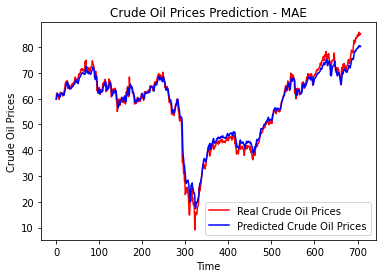

In [52]:
# Visualising the results
plt.plot(test_set[timesteps:len(y_test)].astype(float), color = 'red', label = 'Real Crude Oil Prices')
plt.plot(y_test[0:len(y_test) - timesteps].astype(float), color = 'blue', label = 'Predicted Crude Oil Prices')
plt.title('Crude Oil Prices Prediction - MAE')
plt.xlabel('Time')
plt.ylabel('Crude Oil Prices')
plt.legend()
plt.show()

In [53]:
#MSE (mean sqared error)
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(test_set[timesteps:len(y_test)], y_test[0:len(y_test) - timesteps]))
print(rmse)

2.23801990422908


In [54]:
#MAE (mean absolut error)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_set[timesteps:len(y_test)], y_test[0:len(y_test) - timesteps])
print(mae)

1.6639202750470004


In [55]:
# Initialising the LSTM Model with MSE Loss Function

inputs_1_mse = Input(batch_shape=(batch_size,timesteps,1))
lstm_1_mse = LSTM(10, stateful=True, return_sequences=True)(inputs_1_mse)
lstm_2_mse = LSTM(10, stateful=True, return_sequences=True)(lstm_1_mse)

output_1_mse = Dense(units = 1)(lstm_2_mse)

regressor_mse = Model(inputs=inputs_1_mse, outputs = output_1_mse)

#mse -> mean squared error as loss function
regressor_mse.compile(optimizer='adam', loss = 'mse')
regressor_mse.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(64, 30, 1)]             0         
                                                                 
 lstm_2 (LSTM)               (64, 30, 10)              480       
                                                                 
 lstm_3 (LSTM)               (64, 30, 10)              840       
                                                                 
 dense_1 (Dense)             (64, 30, 1)               11        
                                                                 
Total params: 1,331
Trainable params: 1,331
Non-trainable params: 0
_________________________________________________________________


In [56]:
#some learners constantly reported 502 errors in Watson Studio. 
#This is due to the limited resources in the free tier and the heavy resource consumption of Keras.
#This is a workaround to limit resource consumption

from keras import backend as K

#K.set_session(K.tf.Session(config=K.tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)))

In [57]:
epochs = 120
for i in range(epochs):
    print("Epoch: " + str(i))
    regressor_mse.fit(X_train, y_train, shuffle=False, epochs = 1, batch_size = batch_size)
    regressor_mse.reset_states()

Epoch: 0
123/123 [==============================] - 3s 9ms/step - loss: 0.0077
Epoch: 1
123/123 [==============================] - 1s 8ms/step - loss: 0.0070
Epoch: 2
123/123 [==============================] - 1s 8ms/step - loss: 0.0066
Epoch: 3
123/123 [==============================] - 1s 8ms/step - loss: 0.0063
Epoch: 4
123/123 [==============================] - 1s 8ms/step - loss: 0.0062
Epoch: 5
123/123 [==============================] - 1s 8ms/step - loss: 0.0058
Epoch: 6
123/123 [==============================] - 1s 9ms/step - loss: 0.0058
Epoch: 7
123/123 [==============================] - 1s 9ms/step - loss: 0.0054
Epoch: 8
123/123 [==============================] - 1s 9ms/step - loss: 0.0054
Epoch: 9
123/123 [==============================] - 1s 9ms/step - loss: 0.0050
Epoch: 10
123/123 [==============================] - 1s 8ms/step - loss: 0.0050
Epoch: 11
123/123 [==============================] - 1s 8ms/step - loss: 0.0047
Epoch: 12
123/123 [==============================]

123/123 [==============================] - 1s 9ms/step - loss: 0.0027
Epoch: 103
123/123 [==============================] - 1s 8ms/step - loss: 0.0027
Epoch: 104
123/123 [==============================] - 1s 8ms/step - loss: 0.0027
Epoch: 105
123/123 [==============================] - 1s 8ms/step - loss: 0.0027
Epoch: 106
123/123 [==============================] - 1s 9ms/step - loss: 0.0027
Epoch: 107
123/123 [==============================] - 1s 9ms/step - loss: 0.0027
Epoch: 108
123/123 [==============================] - 1s 9ms/step - loss: 0.0027
Epoch: 109
123/123 [==============================] - 1s 8ms/step - loss: 0.0027
Epoch: 110
123/123 [==============================] - 1s 8ms/step - loss: 0.0027
Epoch: 111
123/123 [==============================] - 1s 8ms/step - loss: 0.0026
Epoch: 112
123/123 [==============================] - 1s 8ms/step - loss: 0.0026
Epoch: 113
123/123 [==============================] - 1s 8ms/step - loss: 0.0026
Epoch: 114
123/123 [===================

In [58]:
import h5py
regressor_mse.save(filepath="my_model_with_mse_30_ts.h5")

In [59]:
regressor_mse = load_model(filepath="my_model_with_mse_30_ts.h5")

In [60]:
predicted_bcg_values_test_mse = regressor_mse.predict(X_test, batch_size=batch_size)
regressor_mse.reset_states()

predicted_bcg_values_test_mse = np.reshape(predicted_bcg_values_test_mse, 
                                       (predicted_bcg_values_test_mse.shape[0], 
                                        predicted_bcg_values_test_mse.shape[1]))
predicted_bcg_values_test_mse = sc.inverse_transform(predicted_bcg_values_test_mse)

pred_mse = []

for j in range(0, testset_length - timesteps):
    pred_mse = np.append(pred_mse, predicted_bcg_values_test_mse[j, timesteps-1])

pred_mse = np.reshape(pred_mse, (pred_mse.shape[0], 1))

12/12 [==============================] - 1s 5ms/step


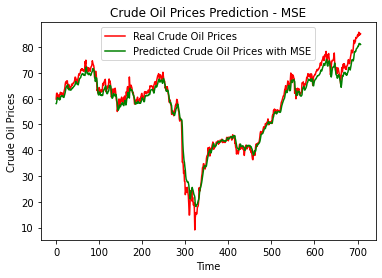

In [61]:
# Visualising the results
plt.plot(test_set[timesteps:len(pred_mse)].astype(float), color = 'red', label = 'Real Crude Oil Prices')
plt.plot(pred_mse[0:len(pred_mse) - timesteps], color = 'green', label = 'Predicted Crude Oil Prices with MSE')
plt.title('Crude Oil Prices Prediction - MSE')
plt.xlabel('Time')
plt.ylabel('Crude Oil Prices')
plt.legend()
plt.show()

In [62]:
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(test_set[timesteps:len(pred_mse)], pred_mse[0:len(pred_mse) - timesteps]))
print(rmse)

2.434514067674344


In [63]:
mean = np.mean(np.float64(test_set[timesteps:len(pred_mse)]))
print(mean)

57.805211864406786


In [64]:
rmse/mean * 100

4.211582293625986

In [65]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_set[timesteps:len(pred_mse)], pred_mse[0:len(pred_mse) - timesteps])
print(mae)

1.852569934823419


In [66]:
mae/mean * 100

3.2048493121502215